In [1]:
import torch
from torch.distributions.uniform import Uniform
import numpy as np
from matplotlib import pyplot as plt
from torch.distributions.utils import broadcast_all

In [2]:
from exponential import RightTruncatedExponential

# Mixture of Discrete and Continuous over [0,1)

This distribution is a mixture of a point masses at $0$ and a continuous distribution over the support $(0, 1)$.

The distribution function looks like this:

\begin{equation}
f(x|\alpha, \beta) = \alpha \delta(x) + (1-\alpha) g(x|\beta)
\end{equation}

where $0 < \alpha < 1$ and $g(x|\beta)$ is a (properly normalised) density over $(0,1)$.

In [12]:
from mixture import MixtureD0C01 as Mixture
from utils import mc_entropy, mc_kl

In [13]:
logits = torch.from_numpy(np.array([0.])).float()
logits

tensor([0.])

In [14]:
p = Mixture(logits0=logits, 
            cont=RightTruncatedExponential(rate=torch.ones(1), upper=1.))
print(p.p0, p.pc)

tensor([0.5000]) tensor([0.5000])


In [15]:
x = p.rsample(torch.Size([10]))
x

tensor([[0.0160],
        [0.6370],
        [0.0000],
        [0.0000],
        [0.7453],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0133],
        [0.0000]])

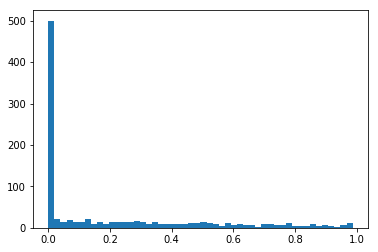

In [16]:
_= plt.hist(p.rsample(torch.Size([1000])).numpy(), bins=50)

In [17]:
p2 = Mixture(logits0=torch.ones(1), 
            cont=RightTruncatedExponential(rate=torch.ones(1) * 1., upper=1.))
print(p2.p0, p2.pc)

tensor([0.7311]) tensor([0.2689])


In [18]:
kl_mc(p, p2, 1000000)

tensor([0.1205])

In [19]:
torch.distributions.kl.kl_divergence(p, p2)

tensor([0.1201])